In [1]:
import json
import numpy as np
import torchvision
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

train_root_path = '/hpi/fs00/share/fg/rabl/strassenburg/datasets/coco/train2017'
train_annotations = '/hpi/fs00/share/fg/rabl/strassenburg/datasets/coco/annotations/instances_train2017.json'

val_root_path = '/hpi/fs00/share/fg/rabl/strassenburg/datasets/coco/val2017'
val_annotations = '/hpi/fs00/share/fg/rabl/strassenburg/datasets/coco/annotations/instances_val2017.json'

In [2]:
%matplotlib inline

In [3]:
def id_to_class_index(annotations_path):
    index = {}
    with open(annotations_path, 'r') as COCO:
        js = json.loads(COCO.read())
        cats = js['categories']

        for cat in cats:
            index[cat['id']] = cat['name']

    return index

In [4]:
train_cat_index = id_to_class_index(train_annotations)
val_cat_index = id_to_class_index(val_annotations)

In [5]:
print(len(train_cat_index))
print(len(val_cat_index))

print(val_cat_index == train_cat_index)

80
80
True


In [9]:
for key, val in train_cat_index.items():
    print('{}: {}'.format(key, val))

1: person
2: bicycle
3: car
4: motorcycle
5: airplane
6: bus
7: train
8: truck
9: boat
10: traffic light
11: fire hydrant
13: stop sign
14: parking meter
15: bench
16: bird
17: cat
18: dog
19: horse
20: sheep
21: cow
22: elephant
23: bear
24: zebra
25: giraffe
27: backpack
28: umbrella
31: handbag
32: tie
33: suitcase
34: frisbee
35: skis
36: snowboard
37: sports ball
38: kite
39: baseball bat
40: baseball glove
41: skateboard
42: surfboard
43: tennis racket
44: bottle
46: wine glass
47: cup
48: fork
49: knife
50: spoon
51: bowl
52: banana
53: apple
54: sandwich
55: orange
56: broccoli
57: carrot
58: hot dog
59: pizza
60: donut
61: cake
62: chair
63: couch
64: potted plant
65: bed
67: dining table
70: toilet
72: tv
73: laptop
74: mouse
75: remote
76: keyboard
77: cell phone
78: microwave
79: oven
80: toaster
81: sink
82: refrigerator
84: book
85: clock
86: vase
87: scissors
88: teddy bear
89: hair drier
90: toothbrush


In [13]:
all = set(range(1,91))
coco_cat = train_cat_index.keys()
print('missing categories in train index:')
print(sorted(list(all.difference(coco_cat))))

coco_cat = val_cat_index.keys()
print('missing categories in val index:')

print(sorted(list(all.difference(coco_cat))))

missing categories in train index:
[12, 26, 29, 30, 45, 66, 68, 69, 71, 83]
missing categories in val index:
[12, 26, 29, 30, 45, 66, 68, 69, 71, 83]


In [6]:
def print_header(text):
    print('\n######################')
    print(text)
    print('######################\n')

print_header('all categories')
print(train_cat_index.values())


######################
all categories
######################

dict_values(['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'])


In [7]:
train_coco_data = torchvision.datasets.CocoDetection(train_root_path, train_annotations)
val_coco_data = torchvision.datasets.CocoDetection(val_root_path, val_annotations)

loading annotations into memory...
Done (t=11.11s)
creating index...
index created!
loading annotations into memory...
Done (t=0.38s)
creating index...
index created!


In [8]:
def category_ids(annotation):
    cat_ids = set()
    for a in annotation:
        cat_ids.add(a['category_id'])

    return cat_ids


def filter_number_of_categories(elements, num_categories):
    return [e for e in elements if len(category_ids(e[1])) <= num_categories]

In [9]:
print_header('validation set')
val_three_cats = filter_number_of_categories(val_coco_data, 3)
print('num pictures with max 3 categories: {}'.format(len(val_three_cats)))
val_two_cats = filter_number_of_categories(val_three_cats, 2)
print('num pictures with max 2 categories: {}'.format(len(val_two_cats)))
val_one_cat = filter_number_of_categories(val_two_cats, 1)
print('num pictures with max 1 categories: {}'.format(len(val_one_cat)))


######################
validation set
######################

num pictures with max 3 categories: 3575
num pictures with max 2 categories: 2595
num pictures with max 1 categories: 1073


In [10]:
print_header('training set')
train_three_cats = filter_number_of_categories(train_coco_data, 3)
print('num pictures with 3 categories: {}'.format(len(train_three_cats)))
train_two_cats = filter_number_of_categories(train_three_cats, 2)
print('num pictures with 2 categories: {}'.format(len(train_two_cats)))
train_one_cat = filter_number_of_categories(train_two_cats, 1)
print('num pictures with 1 categories: {}'.format(len(train_one_cat)))


######################
training set
######################

num pictures with 3 categories: 85234
num pictures with 2 categories: 61065
num pictures with 1 categories: 25207


In [11]:
def show_image(element):
    img, annot = element
    all_cats = category_ids(annot)
    all_cats = set(map(lambda x: train_cat_index[x], all_cats))
    print('annotations set:\n {}'.format(all_cats))
    imshow(np.asarray(img))


######################
image with 3 categories
######################

annotations set:
 {'cell phone', 'clock', 'person'}


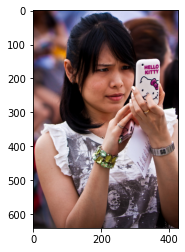

In [12]:
print_header('image with 3 categories')
show_image(val_three_cats[7])


######################
image with 2 categories
######################

annotations set:
 {'tennis racket', 'person'}


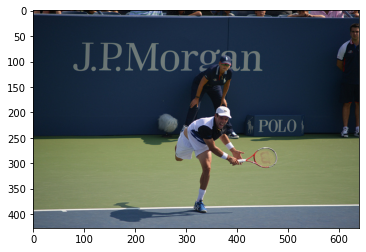

In [13]:
print_header('image with 2 categories')
show_image(val_two_cats[4])


######################
image with 1 category
######################

annotations set:
 {'bear'}


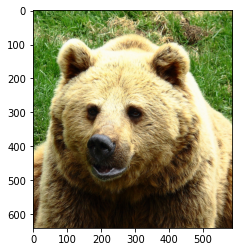

In [14]:
print_header('image with 1 category')
show_image(val_one_cat[0])


######################
image with 1 category
######################

annotations set:
 {'zebra'}


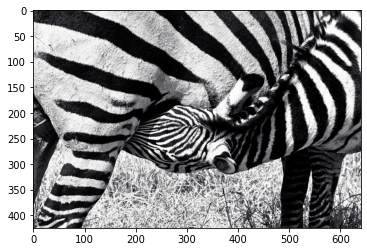

In [15]:
print_header('image with 1 category')
show_image(val_one_cat[1])


In [16]:
def update_distribution(cat, dis):
    if cat in dis:
        dis[cat] += 1
    else:
        dis[cat] = 1

def cat_distribution_one_cat(data):
    cat_dis = {}
    for d in data:
        _, annot = d
        cat_list = list(category_ids(annot))
        if len(cat_list):
            cat = list(category_ids(annot))[0]
            cat = train_cat_index[cat]
        else:
            cat = 'NO CAT'
        update_distribution(cat, cat_dis)
    return cat_dis

def get_top_cat_count(data, limit):
    cat_dist = cat_distribution_one_cat(data)
    sorted_dist = {k: v for k, v in sorted(cat_dist.items(), key=lambda item: item[1], reverse=True)}
    top_cat = list(sorted_dist.keys())[:limit]
    top_counts = list(sorted_dist.values())[:limit]
    return top_cat, top_counts

def plot_one_cat_distribution(data, limit=20):
    top_cats, top_counts = get_top_cat_count(data, limit)

    fig, ax = plt.subplots()
    bar_plot = plt.bar(top_cats, top_counts)
    fig.set_size_inches(18.5, 8)
    plt.xticks(rotation=65)
    plt.show()

def print_data(data):
    for d in data:
        print(d)

def print_key_value(keys, values):
    for i in range(len(keys)):
        print('{}: {}'.format(keys[i],values[i]))


######################
Validation set: 
Category distribution over all pictures with only one assigned category
######################



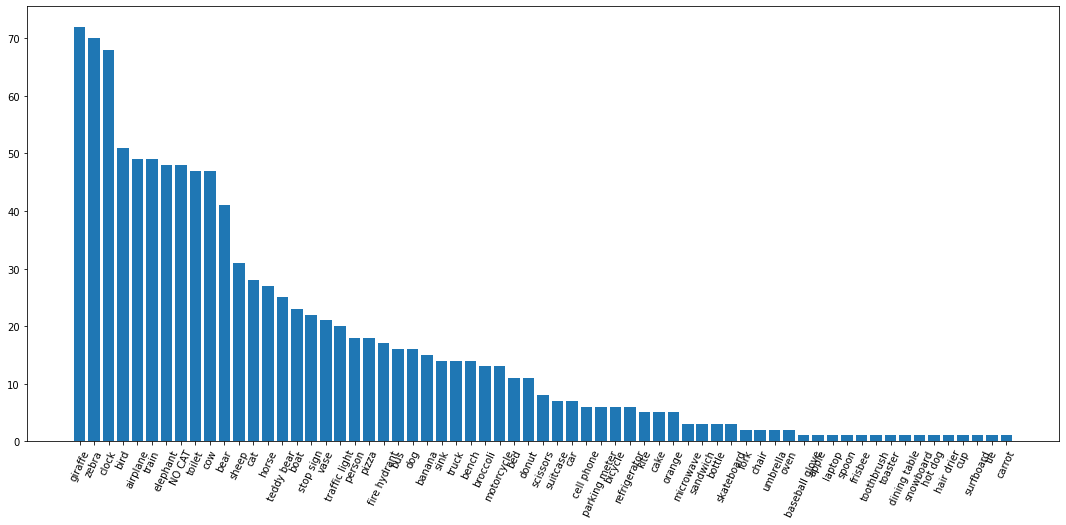

In [17]:
print_header('Validation set: \nCategory distribution over all pictures with only one assigned category')
plot_one_cat_distribution(val_one_cat, 70)

In [18]:
top_val_cats, top_val_counts = get_top_cat_count(val_one_cat, 100)
print_header('Validation set: \nList of categories only one assigned category')
print_key_value(top_val_cats, top_val_counts)


######################
Validation set: 
List of categories only one assigned category
######################

giraffe: 72
zebra: 70
clock: 68
bird: 51
airplane: 49
train: 49
elephant: 48
NO CAT: 48
toilet: 47
cow: 47
bear: 41
sheep: 31
cat: 28
horse: 27
teddy bear: 25
boat: 23
stop sign: 22
vase: 21
traffic light: 20
person: 18
pizza: 18
fire hydrant: 17
bus: 16
dog: 16
banana: 15
sink: 14
truck: 14
bench: 14
broccoli: 13
motorcycle: 13
bed: 11
donut: 11
scissors: 8
suitcase: 7
car: 7
cell phone: 6
parking meter: 6
bicycle: 6
refrigerator: 6
kite: 5
cake: 5
orange: 5
microwave: 3
sandwich: 3
bottle: 3
skateboard: 3
fork: 2
chair: 2
umbrella: 2
oven: 2
baseball glove: 1
apple: 1
laptop: 1
spoon: 1
frisbee: 1
toothbrush: 1
toaster: 1
dining table: 1
snowboard: 1
hot dog: 1
hair drier: 1
cup: 1
surfboard: 1
tie: 1
carrot: 1



######################
Training set: 
Category distribution over all pictures with only one assigned category
######################



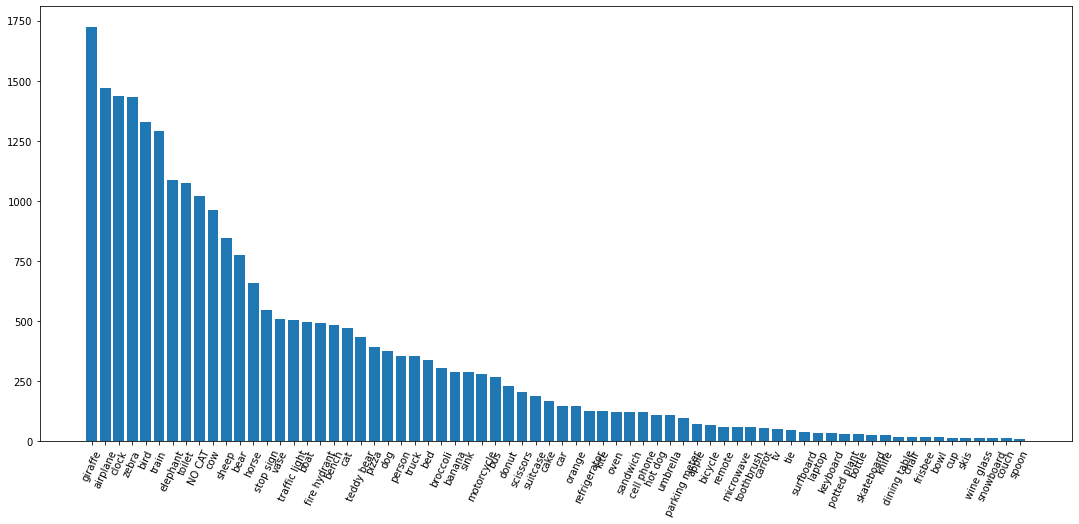

In [19]:
print_header('Training set: \nCategory distribution over all pictures with only one assigned category')
plot_one_cat_distribution(train_one_cat, limit=70)

In [20]:
top_train_cats, top_train_counts = get_top_cat_count(train_one_cat, 100)
print_header('Training set: \nList of categories only one assigned category')
print_key_value(top_train_cats, top_train_counts)


######################
Training set: 
List of categories only one assigned category
######################

giraffe: 1723
airplane: 1470
clock: 1436
zebra: 1432
bird: 1330
train: 1291
elephant: 1089
toilet: 1075
NO CAT: 1021
cow: 962
sheep: 847
bear: 776
horse: 658
stop sign: 546
vase: 509
traffic light: 506
boat: 496
fire hydrant: 492
bench: 483
cat: 471
teddy bear: 434
pizza: 393
dog: 374
person: 354
truck: 353
bed: 337
broccoli: 304
banana: 289
sink: 287
motorcycle: 280
bus: 266
donut: 232
scissors: 206
suitcase: 187
cake: 167
car: 149
orange: 149
refrigerator: 125
kite: 125
oven: 124
sandwich: 123
cell phone: 120
hot dog: 110
umbrella: 109
parking meter: 97
apple: 71
bicycle: 68
remote: 60
microwave: 59
toothbrush: 58
carrot: 56
tv: 50
tie: 48
surfboard: 40
laptop: 33
keyboard: 33
potted plant: 30
bottle: 29
skateboard: 28
knife: 28
dining table: 20
chair: 20
frisbee: 19
bowl: 19
cup: 15
skis: 14
wine glass: 13
snowboard: 13
couch: 12
spoon: 9
toaster: 8
baseball bat: 8
mouse: 7
s

In [21]:
img_root_path = '/hpi/fs00/share/fg/rabl/strassenburg/datasets/imgnet'
imagenet_data = torchvision.datasets.ImageNet(img_root_path, split='val')

In [22]:
img_classes = set()
for cls in imagenet_data.classes:
    for c in cls:
        img_classes.add(c)

coco_classes = set(train_cat_index.values())

common_classes = coco_classes.intersection(img_classes)

print_header('Classes that are in Coco and ImageNet')
for cls in common_classes:
    print(cls)


######################
Classes that are in Coco and ImageNet
######################

orange
refrigerator
banana
vase
mouse
teddy bear
toaster
umbrella
zebra
traffic light
backpack
broccoli
hot dog
microwave
kite
laptop
pizza
cup
dining table
parking meter
remote
hair drier


In [23]:
def get_common_categories(distribution, common_set):
    cats = set(distribution.keys())
    return list(cats.intersection(common_set))

In [30]:
def print_classes(classes, index):
    classes = sorted(classes, key= lambda x: index[x], reverse=True)
    sum = 0
    for cls in classes:
        count = index[cls]
        print('{}: {}'.format(cls, count))
        sum += count
    print('################# SUM: {}'.format(sum))

def print_common_categories_distribution_one_cat(data, common_classes):
    one_train_cat_dist = cat_distribution_one_cat(data)
    one_common = get_common_categories(one_train_cat_dist ,common_classes)

    print('simple sanity check')
    s = sum(list(one_train_cat_dist.values()))
    l = len(data)
    print(s == l)
    print('\n')

    print_classes(one_common, one_train_cat_dist)




In [31]:
print_header('Validation set:\nElements with only one class AND Category is in Imagenet and in Coco')
print_common_categories_distribution_one_cat(val_one_cat, common_classes)


######################
Validation set:
Elements with only one class AND Category is in Imagenet and in Coco
######################

simple sanity check
True


zebra: 70
teddy bear: 25
vase: 21
traffic light: 20
pizza: 18
banana: 15
broccoli: 13
refrigerator: 6
parking meter: 6
kite: 5
orange: 5
microwave: 3
umbrella: 2
hair drier: 1
hot dog: 1
laptop: 1
cup: 1
toaster: 1
dining table: 1
################# SUM: 215


In [32]:
print_header('Training set:\nElements with only one class AND Category is in Imagenet and in Coco')
print_common_categories_distribution_one_cat(train_one_cat, common_classes)


######################
Training set:
Elements with only one class AND Category is in Imagenet and in Coco
######################

simple sanity check
True


zebra: 1432
vase: 509
traffic light: 506
teddy bear: 434
pizza: 393
broccoli: 304
banana: 289
orange: 149
refrigerator: 125
kite: 125
hot dog: 110
umbrella: 109
parking meter: 97
remote: 60
microwave: 59
laptop: 33
dining table: 20
cup: 15
toaster: 8
mouse: 7
hair drier: 3
backpack: 2
################# SUM: 4789


In [33]:
def get_category_one_cat(e):
    _, annot = e
    cat_ids = category_ids(annot)
    assert len(cat_ids) <= 1
    if len(cat_ids) == 1:
        cat = train_cat_index[cat_ids.pop()]
        return cat
    else:
        return 'NO CAT'

def filter_category_one_cat(data, categories):
    filtered = []
    for e in data:
        cat = get_category_one_cat(e)
        if cat in categories:
            filtered.append(e)

    return filtered

In [34]:
one_cat_common = filter_category_one_cat(train_one_cat, common_classes)

print('check: zebra should be same nuber as above')
zebra = filter_category_one_cat(train_one_cat, ['zebra'])
print('zebra: {}'.format(len(zebra)))

check: zebra should be same nuber as above
zebra: 1432


annotations set:
 {'zebra'}


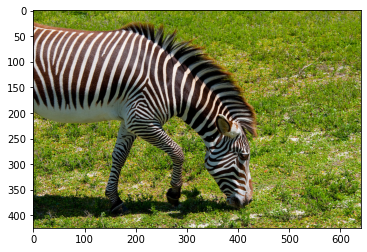

In [35]:
show_image(one_cat_common[0])

annotations set:
 {'banana'}


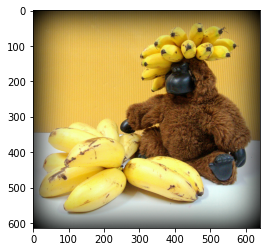

In [36]:
show_image(one_cat_common[1432])

annotations set:
 {'teddy bear'}


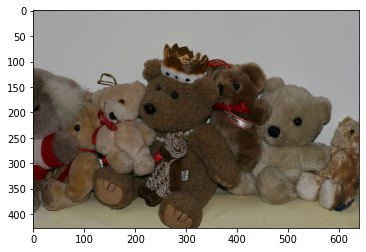

In [37]:
show_image(one_cat_common[4200])

annotations set:
 {'traffic light'}


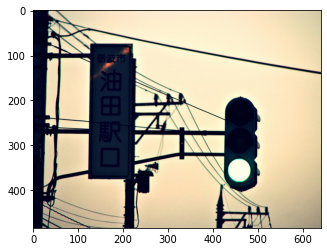

In [38]:
show_image(one_cat_common[4250])


In [39]:
def get_img_size(element):
    img, _ = element
    return img.size

def get_height(element):
    _, h = get_img_size(element)
    return h

def get_width(element):
    w, _ = get_img_size(element)
    return w

def num_pixels(element):
    w, h = get_img_size(element)
    return w * h

In [40]:
def avg_parameters(extractor, elements):
    extracted = list(map(extractor, elements))
    return sum(extracted) / len(elements)

print("VALIDATION SET\n")
print_header("average amount of pixels per image")
print(avg_parameters(num_pixels, one_cat_common))
print_header("average height per image")
print(avg_parameters(get_height, one_cat_common))
print_header("average width per image")
print(avg_parameters(get_width, one_cat_common))





VALIDATION SET


######################
average amount of pixels per image
######################

272999.770933389

######################
average height per image
######################

483.38818124869493

######################
average width per image
######################

571.4201294633535
